In [5]:
from src import esma

In [6]:
#Step 1 - Initialize model
model = esma.project(project_id="C") #Initialize model
model.outdir('./outdir')
model.set_cores(64) #Define number of processing cores
model.get_structure(format="poscar",path="./Structures/C.poscar")
model.set_pseudo(path="./Pseudopotentials/PBE/PAW")
model.ecutwfc(120) #Wavefunction cut-off
model.ecutrho(500)
model.k_points(8) #k mesh 
model.degauss(0.03) #degauss value
model.conv_thr("1e-8") #electron convergence threshold
model.smearing('gaussian') #Marzari-Vanderbilt smearing

In [7]:
model.debug(True)

In [8]:
#Step 2 - Crystal optimization
model.optimize('vc-relax')

Starting vc-relax iteration 1 
vc-relax is converged after 1 steps


In [9]:
#Step 3 - Atomic optimization
model.make_layer(layer_type='mono') #mono layer 
model.k_points([8,8,1])
model.optimize('relax')

Starting relax iteration 1 
relax is converged after 1 steps


In [10]:
#Step 4 - Scf calculation
# model.nbnd(10)
model.nbnd(12)
model.calculate('scf')

In [11]:
#Step 5 - Bands calculation
label = ['GAMMA','M','K','GAMMA'] #choose corners
points = [[0,0,0],[0.5,0,0],[0.33333,0.33333,0],[0,0,0]]
model.band_points(label=label,points=points,number=40) #define path
model.calculate('bands')

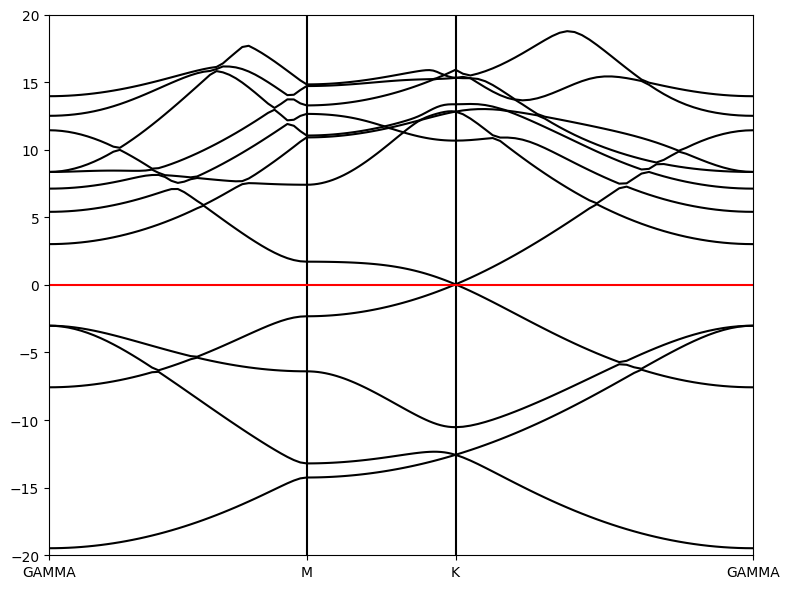

In [12]:
#Step 6 - Plotting
model.plot('electron',ylim=[-20,20],save=True) #plot electron bands

In [13]:
model.k_points([16,16,1],grid=True) #k mesh 
model.nosym('true')
model.calculate('nscf')

In [34]:
model.wannier_orbital({"C":["sp2"]})
model.dis_win_min(-15)
model.dis_win_max(15)
model.dis_froz_min(-10)
model.dis_froz_max(5)
model.num_wann(3)
model.config['wannier90']['num_iter'] = 1000  
model.config['wannier90']['dis_conv_tol']  = 1e-14    # Stricter convergence
model.config['wannier90']['dis_mix_ratio']  =  0.5     # Slower mixing for stability
model.config['wannier90']['guiding_centres']  = 'true'
model.config['wannier90']['dis_num_iter']  = 1000

In [35]:
model.debug(False)

In [36]:
model.calculate('wannier90')

wannier90 for results is started
wannier90 for results is finished


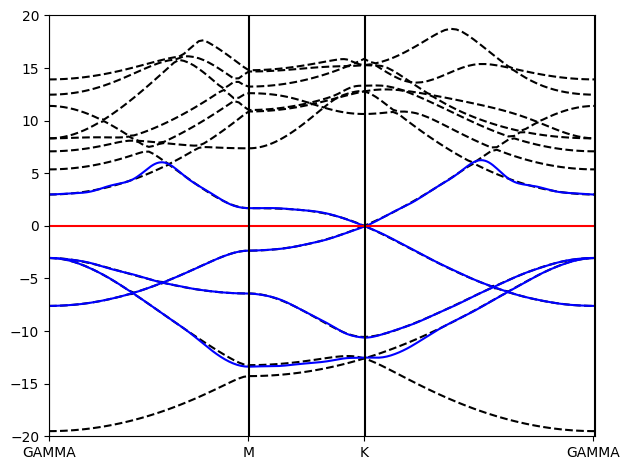

In [37]:
model.plot(calculation='wannier90',ylim=[-20,20])